In [18]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

X, y = make_classification(
    n_samples=100,
    n_features=20,
    n_informative=8,
    n_clusters_per_class=1,
)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

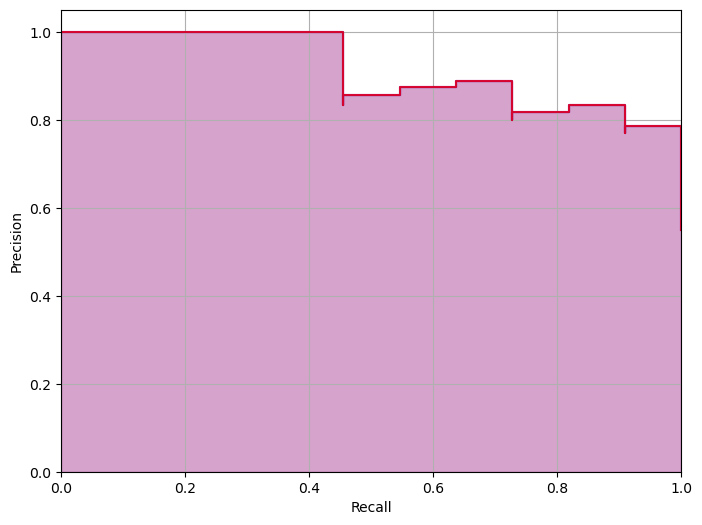

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

y_pred_proba = logistic_regression_model.predict_proba(X_test)[:, 1]

min_range = -1
max_range = 1
rescaled_y_pred_proba = min_range + (max_range - min_range) * (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())

plt.figure(figsize=(8, 6))

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.step(recall, precision, color='b', alpha=0.8, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

precision, recall, _ = precision_recall_curve(y_test, rescaled_y_pred_proba)

plt.step(recall, precision, color='r', alpha=0.8, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(True)

plt.show()